In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [2]:
traindata = pd.read_csv(r"C:\Users\dell\OneDrive\Bureau\projets\IDS\Train_data.csv")
traindata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
cat_col = [ col for col in traindata.columns if traindata[col].dtype == 'object']
print ("Categorical Features",cat_col)
num_col = [ col for col in traindata.columns if traindata[col].dtype != 'object']
print ("Numerical Features",num_col)

Categorical Features ['protocol_type', 'service', 'flag', 'class']
Numerical Features ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [4]:
print(f"Number of duplicate rows: {traindata.duplicated().sum()}")

Number of duplicate rows: 0


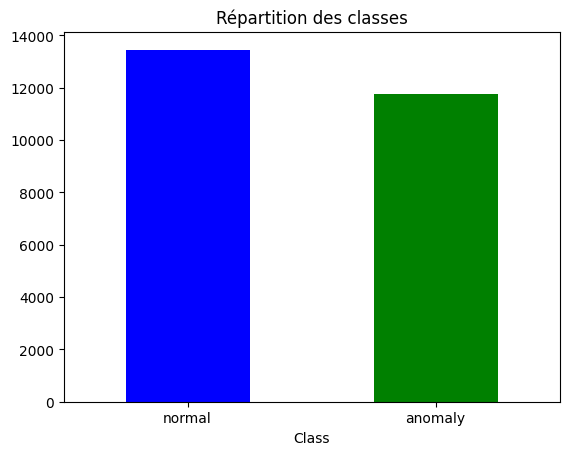

In [5]:
traindata['class'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Répartition des classes')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.show()

In [6]:
x_train = traindata.drop(['class'], axis=1)
y_train = traindata['class']
x_train = x_train.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

In [7]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.70, random_state=2)

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
KNN_train, KNN_test = knn_model.score(x_train, y_train), knn_model.score(x_test, y_test)
print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Accuracy:  0.990209050013231
Train Score: 0.9936486333219916
Test Score: 0.990209050013231


In [10]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)
print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.954633095157083
Test Score: 0.9556761047896268


In [11]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)
BNB_train, BNB_test = BNB_model.score(x_train , y_train), BNB_model.score(x_test , y_test)

print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.895939662016559
Test Score: 0.8946811325747552
